# Machine Learning Models

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [87]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [88]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [89]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import GridSearchCV

In [91]:
ds = pd.read_csv('./data/life_satisfaction_cleaned.csv', index_col=0)

In [92]:
ds.columns

Index(['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PH010: GENERAL HEALTH',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD080: Internet connection for personal use at home',
       'PW010: OVERALL LIFE SATISFACTION'],
      dtype='object')

In [93]:
#subsets
background = ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))']

health = ['PH010: GENERAL HEALTH',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS']



bneeds= ['PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity']

y=  ['PW010: OVERALL LIFE SATISFACTION']

subsets= [background,education,work,health,job,bneeds, y]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PH010: GENERAL HEALTH',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G: INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PW010: OVERALL LIFE SATISFACTION']

In [94]:
ds.head()

,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK,PL051: OCCUPATION (ISCO-08 (COM)),PH010: GENERAL HEALTH,PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT,PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT,PY010G: INCOME,PY090G++: SOCIAL BENEFITS,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month,PD060: Regularly participate in a leisure activity,PD080: Internet connection for personal use at home,PW010: OVERALL LIFE SATISFACTION
0,43,1,2.0,3,0,2,3.0,1.0,2,52.0,1.0,2,2,37262.33,0.00,3.0,1.0,1.0,8.0
1,84,1,2.0,1,0,2,2.0,7.0,1,62.0,3.0,2,2,0.00,18846.06,1.0,1.0,1.0,7.0
2,68,0,2.0,3,0,1,5.0,11.0,2,23.0,3.0,2,2,0.00,9336.96,1.0,1.0,1.0,7.0
3,82,0,2.0,3,0,2,2.0,7.0,1,51.0,5.0,2,2,0.00,11999.28,1.0,3.0,1.0,6.0
4,70,0,5.0,3,0,2,3.0,1.0,1,44.0,1.0,2,2,23516.66,0.00,2.0,1.0,3.0,10.0


In [95]:
ds.isna().sum()

PB140: YEAR OF BIRTH                                                                          0
PB150: SEX                                                                                    0
PB190: MARITAL STATUS                                                                         0
PB200: CONSENSUAL UNION                                                                       0
PB220A: CITIZENSHIP                                                                           0
PE010: CURRENT EDUCATION ACTIVITY                                                             0
PE040: HIGHEST ISCED LEVEL ATTAINED                                                           0
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                                                   0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK                                        0
PL051: OCCUPATION (ISCO-08 (COM))                                                             0
PH010: GENERAL HEALTH                   

In [96]:
### refresh ds
def reload():
    return pd.read_csv('./data/life_satisfaction_cleaned.csv', index_col=0)


### 1. Prepare Data

In [97]:
data = reload()

In [98]:
### define x
XCol= list(data.columns) 
XCol.remove(y)

In [99]:
data[XCol].head()
data[y]

0         8.0
1         7.0
2         7.0
3         6.0
4        10.0
         ... 
22037     7.0
22038     8.0
22039    10.0
22040     6.0
22041     9.0
Name: PW010: OVERALL LIFE SATISFACTION, Length: 16388, dtype: float64

## 1.1 Create Dummy

In [100]:
data.columns

Index(['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PH010: GENERAL HEALTH',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G: INCOME', 'PY090G++: SOCIAL BENEFITS',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD080: Internet connection for personal use at home',
       'PW010: OVERALL LIFE SATISFACTION'],
      dtype='object')

In [101]:
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD080: Internet connection for personal use at home',
      ]

In [102]:
create_dummy=set(XCol).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns


Index(['PB140: YEAR OF BIRTH', 'PH010: GENERAL HEALTH', 'PY010G: INCOME',
       'PY090G++: SOCIAL BENEFITS', 'PW010: OVERALL LIFE SATISFACTION',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_2.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_3.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_5.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_6.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_7.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_8.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_10.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0',
       'PB220A: CITIZENSHIP_1', 'PE010: CURRENT EDUCATION ACTIVITY_2',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_3.0',
       'PB200: CONSENSUAL UNION_2', 'PB200: CONSE

In [103]:
#use dummy:
data = data_dummy


## 1.2 Binning

In [104]:
tobin = ['PB140: YEAR OF BIRTH','PY010G: INCOME',
       'PY090G++: SOCIAL BENEFITS']

In [105]:
## bin in 10 bins (equal to life_satisfaction)
bin_labels = [x for x in range(1,11)]
bin_labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

bin data['PB140: YEAR OF BIRTH']

In [106]:
data['PB140: YEAR OF BIRTH'] = pd.cut(ds['PB140: YEAR OF BIRTH'], 10, labels = bin_labels)

In [107]:
data['PB140: YEAR OF BIRTH'].head()

0     3
1    10
2     7
3    10
4     8
Name: PB140: YEAR OF BIRTH, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

bin data['PY010G: INCOME']

In [108]:
data['PY010G: INCOME'] = data['PY010G: INCOME'].apply(lambda x: 0 if x==0 else np.log(x))


In [109]:
data['PY010G: INCOME'] = pd.cut(ds['PY010G: INCOME'], 10, labels = bin_labels)

In [110]:
data['PY010G: INCOME']

0        4
1        2
2        2
3        2
4        3
        ..
22037    3
22038    3
22039    3
22040    3
22041    4
Name: PY010G: INCOME, Length: 16388, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

bin data[ 'PY090G++: SOCIAL BENEFITS']

In [111]:
data['PY090G++: SOCIAL BENEFITS'] = data['PY090G++: SOCIAL BENEFITS'].apply(lambda x: 0 if x==0 else np.log(x))


In [112]:
data['PY090G++: SOCIAL BENEFITS'] = pd.cut(ds['PY090G++: SOCIAL BENEFITS'], 10, labels = bin_labels)

In [113]:
data['PY090G++: SOCIAL BENEFITS']

0        1
1        2
2        1
3        1
4        1
        ..
22037    1
22038    1
22039    1
22040    1
22041    1
Name: PY090G++: SOCIAL BENEFITS, Length: 16388, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

## 2. Define X and y

In [114]:
## define X and y
XCol= list(data.columns) 
XCol.remove(y)
X=data[XCol]
y = data[y]

# 3. Optimize recursive feature elimination (RFE)

In [115]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [116]:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X,y)


selector.ranking_
#selector.support_

array([69, 56, 55, 67, 52, 64,  7, 39, 66, 54, 50, 37, 53, 70, 60, 40, 65,
       49, 57, 42, 58,  8, 12, 51, 68, 41, 43, 61, 33, 34, 10, 59,  1, 31,
       46, 20, 15, 47, 16, 21,  4, 23, 28, 27,  9,  1, 25, 48, 22, 36, 19,
       29, 38, 26, 17,  5, 24,  6,  1, 32,  1, 18, 44, 11, 30,  1, 14,  3,
       45, 63, 62, 35, 13,  2])

In [117]:
rfe_col = []
for x in range(len(X.columns)):
    if selector.ranking_[x]<=5:
        rfe_col.append(X.columns[x])
print(len(rfe_col))
rfe_col

9


['PL051: OCCUPATION (ISCO-08 (COM))_12.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_26.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_62.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_73.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_92.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_94.0',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT_8']

In [118]:
Y_lin = y
X_lin = X[rfe_col]

In [119]:
lm = LinearRegression()
model = lm.fit(X_lin,Y_lin)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_lin)
print(r2_score(y, y_pred))


Intercept:  7.268860405984969
Coef:  [-0.2704013  -0.20629158  0.28982626 -0.16886041 -0.23447116  0.312072
 -0.54361786  0.2176309  -0.23009341]
0.0013294287847981368


<Figure size 432x288 with 0 Axes>

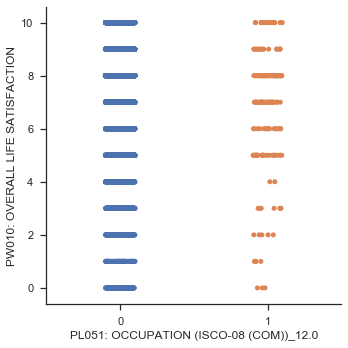

<Figure size 432x288 with 0 Axes>

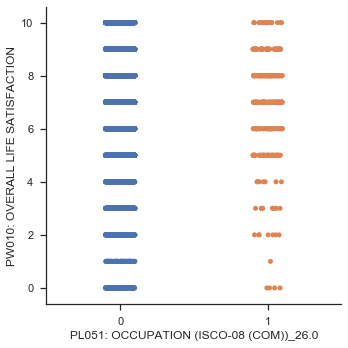

<Figure size 432x288 with 0 Axes>

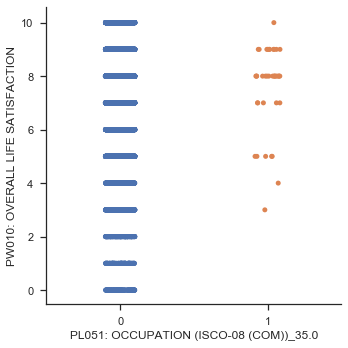

<Figure size 432x288 with 0 Axes>

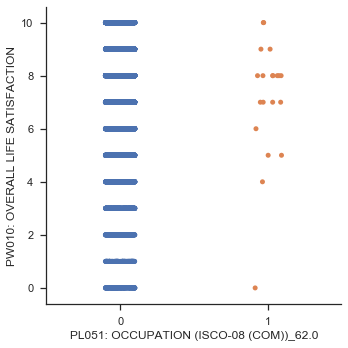

<Figure size 432x288 with 0 Axes>

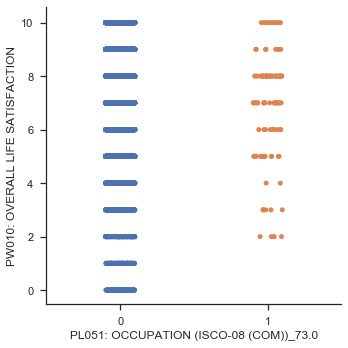

<Figure size 432x288 with 0 Axes>

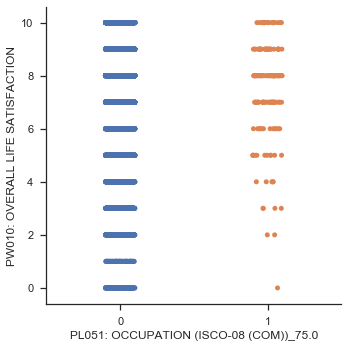

<Figure size 432x288 with 0 Axes>

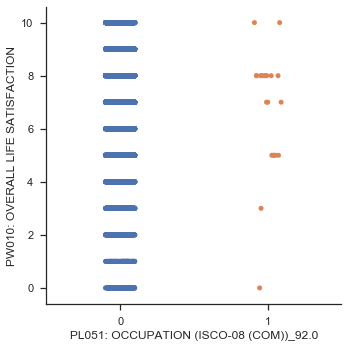

<Figure size 432x288 with 0 Axes>

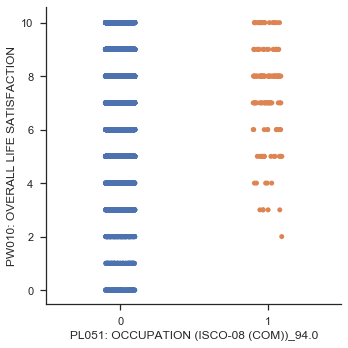

<Figure size 432x288 with 0 Axes>

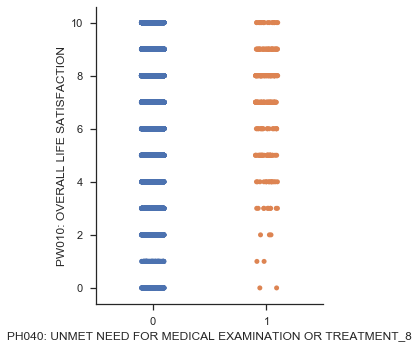

In [120]:
sns.set(style="ticks")
for x in rfe_col:
    plt.figure(figsize=(6,4))
    ax=sns.catplot(x=x, y ='PW010: OVERALL LIFE SATISFACTION', data=data)
    name ="./pics/"+x[7:]+".png"
    ax.savefig(name)

## 4. PCA / ICA

In [121]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components="mle", whiten=True, svd_solver='full')
transformer = FastICA(n_components=7,random_state=0)

# Conduct PCA
features_pca = pca.fit_transform(X)
features_ica =  transformer.fit_transform(X)


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [122]:
features_pca.shape

(16388, 73)

In [123]:
features_ica.shape

(16388, 7)

# 2. Regression

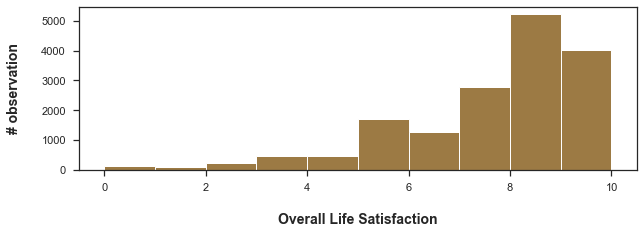

In [124]:
# Create bars and choose color
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.set_facecolor('#f2e3cb')
ax.hist(y, color = ('#9c7a44'))
 
#rgb(60,179,113)
# Add title and axis names
plt.xlabel('Overall Life Satisfaction', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
plt.ylabel('# observation', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
ax.set_facecolor("white") ## white background
# Limits for the Y axis

# Create names
#plt.xticks([x for x in rang(-1,10)], [x for x in rang(-1,10)])
 
# Show graphic


plt.savefig('./pics/fig1.png', bbox_inches='tight') ## bbbox to not cut the labels
plt.show()

## 2.1. Scale

In [125]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape


(16388, 74)

In [126]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(16388, 74)

In [127]:
scaler = Normalizer()
X_norm = scaler.fit_transform(X)
X_norm.shape

(16388, 74)

## 2.4 run different models

#### a)  Linear Regression Model

In [128]:
## with RFE
X_train, X_test, y_train, y_test = train_test_split(X_lin, Y_lin, test_size=0.2, random_state=10)

In [129]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_, "\n")

y_pred  = lm.predict(X_test)

print ("LR with RFE: MaE", mean_absolute_error(y_test, y_pred))
print ("LR with RFE: MSE", mean_squared_error(y_test, y_pred))
print ("LR with RFE: r2", r2_score(y_test, y_pred))

Intercept:  7.27014285455313
Coef:  [-0.16459553 -0.18445237  0.10916749 -0.27014285 -0.18792492  0.31960036
 -0.04407536  0.17568512 -0.39101245] 

LR with RFE: MaE 1.5178608211533526
LR with RFE: MSE 3.8946691521454175
LR with RFE: r2 -0.0002078631715054513


In [130]:
## with features_ica
X_train, X_test, y_train, y_test = train_test_split(features_ica, y, test_size=0.2, random_state=10)

In [131]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_, "\n")

y_pred  = lm.predict(X_test)

print ("LR with RFE: MaE", mean_absolute_error(y_test, y_pred))
print ("LR with RFE: MSE", mean_squared_error(y_test, y_pred))
print ("LR with RFE: r2", r2_score(y_test, y_pred))

Intercept:  7.26073070542385
Coef:  [ 2.53110762  2.00027555  1.3751821  -2.53019405 -1.82664411  1.15520649
  3.73601373] 

LR with RFE: MaE 1.518494417727502
LR with RFE: MSE 3.8923340633304315
LR with RFE: r2 0.00039182170613472067


In [132]:
### with all
X_train, X_test, y_train, y_test = train_test_split(features_pca, y, test_size=0.2, random_state=10)

In [133]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_, "\n")

y_pred  = lm.predict(X_test)

print ("LR with RFE: MaE", mean_absolute_error(y_test, y_pred))
print ("LR with RFE: MSE", mean_squared_error(y_test, y_pred))
print ("LR with RFE: r2", r2_score(y_test, y_pred))

Intercept:  7.260771016020764
Coef:  [-0.01783738  0.02165031 -0.0062055  -0.02304086  0.02423193 -0.01500022
  0.0120154   0.01839708  0.00294316  0.0198796  -0.0222833   0.00445655
 -0.0176311  -0.02132837 -0.01573819 -0.00789142 -0.00782395 -0.01155546
  0.00244547 -0.00366573 -0.04836939 -0.00967367  0.00963927  0.02432805
 -0.01260015 -0.01167532 -0.01705914  0.03544819  0.02473114 -0.01438362
  0.02535671 -0.00406034 -0.01473812  0.00997865  0.01784917 -0.03620862
  0.02385181 -0.00089726 -0.00725681 -0.02120992 -0.00540901 -0.02380194
  0.01779731  0.01455257 -0.01852223  0.00512539 -0.00298687 -0.00327601
 -0.01270312  0.01887782  0.01543592  0.00436536  0.01859401  0.01245694
 -0.01562411 -0.00840655 -0.01276921 -0.0236421   0.00884637  0.037625
  0.00327257  0.01982812  0.01114737 -0.0072052  -0.00153164  0.00032949
 -0.00163256 -0.01902797 -0.00855448  0.00817269  0.02117263 -0.00732283
 -0.00898549] 

LR with RFE: MaE 1.5180309817037365
LR with RFE: MSE 3.9122787267818557
L

#### c)  Taylor (pipeline)

In [134]:
## with features_ica
X_train, X_test, y_train, y_test = train_test_split(features_ica, y, test_size=0.2)

In [135]:
for k in range(1,7):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True
    model = poly_model.fit(X_train, y_train)
    
    
    #print(poly_model.score(X_test, y_test))

    y_pred  = poly_model.predict(X_test)
    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))


1 3.7823295936098007 0.0004914230158521438
2 3.783298133944418 0.00023547906711718358
3 3.8097079976263486 -0.006743522792389989
4 3.961779107169902 -0.046929438519319966
5 4.419888451218219 -0.167988221801048
6 71.94477576891182 -18.011939248160378


In [136]:
## with all
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
"""for k in range(1,7):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True
    model = poly_model.fit(X_train, y_train)
    
    
    #print(poly_model.score(X_test, y_test))

    y_pred  = poly_model.predict(X_test)
    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))"""


'for k in range(1,7):\n    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True\n    model = poly_model.fit(X_train, y_train)\n    \n    \n    #print(poly_model.score(X_test, y_test))\n\n    y_pred  = poly_model.predict(X_test)\n    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))'

In [138]:
"""
1 3.9686983933171134 -0.004575164310175017
2 2.2740272104599375e+18 -5.756122114092499e+17
"""

'\n1 3.9686983933171134 -0.004575164310175017\n2 2.2740272104599375e+18 -5.756122114092499e+17\n'

In [139]:
## with RFE
X_train, X_test, y_train, y_test = train_test_split(X_lin, Y_lin, test_size=0.2)

In [140]:
"""for k in range(1,7):
    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True
    model = poly_model.fit(X_train, y_train)
    
    
    #print(poly_model.score(X_test, y_test))

    y_pred  = poly_model.predict(X_test)
    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
"""

'for k in range(1,7):\n    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=k), LinearRegression())# include_bias = False, interaction_only = True\n    model = poly_model.fit(X_train, y_train)\n    \n    \n    #print(poly_model.score(X_test, y_test))\n\n    y_pred  = poly_model.predict(X_test)\n    print(k, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))\n'

In [141]:
"""
1 3.9043148729116037 -0.0010311473497468526
2 7.675452798045813e+21 -1.9679169254929562e+21
3 8.016719286627261e+21 -2.0554145776385034e+21
4 1.1155816471151525e+23 -2.8602508059018554e+22

"""

'\n1 3.9043148729116037 -0.0010311473497468526\n2 7.675452798045813e+21 -1.9679169254929562e+21\n3 8.016719286627261e+21 -2.0554145776385034e+21\n4 1.1155816471151525e+23 -2.8602508059018554e+22\n\n'

#### c)  Regression Tree

In [142]:
## with features_ica
X_train, X_test, y_train, y_test = train_test_split(features_ica, y, test_size=0.2)

In [143]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-1.1122850299180116

In [144]:
## with RFE
X_train, X_test, y_train, y_test = train_test_split(X_lin, Y_lin, test_size=0.2)

In [145]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-0.00041478769643910063

In [146]:
## with all- with scaler -- no change
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2)

In [147]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

-1.1172743318581602

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [148]:
## with features_ica
X_train, X_test, y_train, y_test = train_test_split(features_ica, y, test_size=0.2)

In [149]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

r2_score(y_test, y_pred)

-0.3423345005978269

In [150]:
## with RFE
X_train, X_test, y_train, y_test = train_test_split(X_lin, Y_lin, test_size=0.2)

In [151]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

r2_score(y_test, y_pred)

-0.9235640083004317

In [152]:
## with all
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

r2_score(y_test, y_pred)

-0.3425026012487655

Conclucsion: non of the model has a positive r2, except of the linear regression with featurese_ICA. --> try classification

## 2. Classification

### 2.1.1 prepare data

In [154]:
## binning of y
y_binned= y.apply(lambda x: 1 if x>=8 else 0)

In [155]:

print(y_binned.value_counts(normalize=True))

## --> balanced?

1    0.563949
0    0.436051
Name: PW010: OVERALL LIFE SATISFACTION, dtype: float64


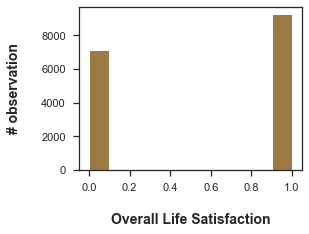

In [156]:
# Create bars and choose color
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.set_facecolor('#f2e3cb')
ax.hist(y_binned, color = ('#9c7a44'))
 
 
# Add title and axis names
plt.xlabel('Overall Life Satisfaction', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
plt.ylabel('# observation', fontsize ='14', fontweight='bold', fontname="Arial", labelpad = 20)
ax.set_facecolor("white") ## white background
# Limits for the Y axis

# Create names
#plt.xticks([x for x in rang(-1,10)], [x for x in rang(-1,10)])
 
# Show graphic
plt.savefig('./pics/fig2.png', bbox_inches='tight') ## bbbox to not cut the labels
plt.show()



#### a) Logistic Regression

In [171]:
##  all
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2)
X_train.shape


(13110, 74)

In [173]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 56.31
precision: 46.11
recall: 56.86


,Satisfied,Not satisfied
True,1769,77
False,1342,90


#### b) DecisionTree Classify

In [174]:
##  all
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2)
X_train.shape

(13110, 74)

In [180]:
dtc = DecisionTreeClassifier(class_weight='balanced', splitter= 'best', random_state = 29)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 51.53
precision: 45.33
recall: 56.41


,Satisfied,Not satisfied
True,1034,655
False,799,790


In [182]:
param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(1,30)}
dtc = DecisionTreeClassifier(random_state = 29)
dtc_cv = GridSearchCV(dtc, param_grid, scoring='accuracy',  n_jobs=-1)#eed = True,
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced', 'max_features': 28, 'splitter': 'best'}

In [183]:
dtc = DecisionTreeClassifier(class_weight='balanced' ,max_features= 28, splitter= 'best', random_state = 29)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 50.49
precision: 43.93
recall: 55.33


array([[ 612,  842],
       [ 781, 1043]], dtype=int64)

In [ ]:
## try with ica

In [184]:
X_train, X_test, y_train, y_test = train_test_split(features_ica, y_binned, test_size=0.2)
X_train.shape

(13110, 7)

In [185]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 49.88
precision: 41.74
recall: 55.93


array([[ 584,  828],
       [ 815, 1051]], dtype=int64)

In [188]:
param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(1,7)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid)
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced', 'max_features': 3, 'splitter': 'best'}

In [189]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', splitter= 'best', max_features=3)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 51.22
precision: 43.52
recall: 57.28


,Satisfied,Not satisfied
True,1051,628
False,784,815


In [ ]:
### Try with x_RFE

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_binned, test_size=0.2)
X_train.shape

(13110, 9)

In [191]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', splitter= 'best')#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 54.82
precision: 47.37
recall: 55.28


,Satisfied,Not satisfied
True,1707,90
False,1381,100


In [192]:
param_grid={'splitter': ['best','random'], 'class_weight': ["balanced"], 'max_features': range(1,7)}
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid)
dtc_cv.fit(X_train, y_train)
dtc_cv.best_params_

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'class_weight': 'balanced', 'max_features': 1, 'splitter': 'random'}

In [193]:
dtc = DecisionTreeClassifier(class_weight= 'balanced', splitter= 'best', max_features=1)#class_weight='balanced'max_features= 10, 
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
conf=confusion_matrix(y_test, y_pred)
print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
print( "recall: " +str(round((conf[1,1])/ (conf[0,1]+conf[1,1])*100,2)))
tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 54.82
precision: 47.37
recall: 55.28


,Satisfied,Not satisfied
True,1707,90
False,1381,100


#### c) Support Vector Maschine

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2)
X_train.shape

(13110, 74)

In [195]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [196]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

SVM Algorithm Test Accuracy 56.71%


In [197]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 56.71
precision: nan


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  after removing the cwd from sys.path.


,Satisfied,Not satisfied
True,1859,0
False,1419,0


#### d) K-Nearest Neighbour

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2)
X_train.shape

(13110, 74)

In [199]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [200]:
acc = knn.score(X_test, y_test)*100
acc

48.29164124466138

In [201]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
conf_df=pd.DataFrame([[ tp, tn  ], [fp ,fn]], index=['True', 'False'], columns=['Satisfied', 'Not satisfied'])

conf_df

accuracy: 48.29
precision: 43.13


,Satisfied,Not satisfied
True,613,970
False,416,1279


### conclusion

- Decision Tree classifier  and K-Nehigbours have the most balanced confusion matrix.
- The results are pretty much the same for all X, features X and X_RFE
- But non of them are good models, bcause accuracy is bellow 70%

Process	(backup)

•	Simbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning
